In [23]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

## importing data

In [24]:
boston = datasets.load_boston()
x = boston.data
y = boston.target

## description of the data

In [25]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## splitting the data into train and test

In [26]:
train,test,labelsTrain,labelsTest=train_test_split(x,y,test_size=0.3)

## standardizing data

In [27]:
std=StandardScaler()
std.fit(train)
train=std.transform(train)
test=std.transform(test)

## custom algorithm

### pseudo code

weightVec.shape-->(13,1)

intercept-->const(1,1)

total iterations-->n_epochs(200)

for epoch in range(epoch):

    total error=0
    
    for i in range(train data):
        
        randomly take data point and its class
        
        predict its weight using randomly initialized weightvec and intercept
        
        cal error and add it to total error
        
        new WeightVec=old-learningrate*(2/n)*(datapoint * error)
        
        new intercept=old-lrate*(2/n)* (error)
        
    change learning rate.

In [28]:
#weight vector
WeightVec=np.random.randn(13,1)

#intercept term
intercept=np.random.randn(1,1)  

#learning rate
lrate=0.5

#total iterations
n_epochs=200

power_t=0.25
for epoch in range(1,200):
    #total error for this epoch
    Ferror=0
    
    #no. of data points
    n=train.shape[0]
    
    for i in range(n):
        #batch
        k=np.random.randint(0,n)
        
        xTrain=train[k,:]
        xTrain=xTrain.reshape(1,train.shape[1])#xTrain.shape=(1,13)
        
        yTrain=labelsTrain[k]
        yTrain=yTrain.reshape(1,1)#yTrain.shape(1,1)
        
        #ypred=w.T*X+b
        ypred=np.dot(xTrain,WeightVec)+ intercept#(1)
        
        #difference in prediction
        error=ypred-yTrain
        
        #summing up the error
        Ferror+=error**2
        
        #x.T*(ypred-trueY)
        temp1=xTrain.T.dot(error)#(13,1)*(1,1)=(13,1)
        
        #updated weight vector
        #w(i)=w(i-1)-(2/n)*lrate*(y(i)-w.T*X(i)*X(i))
        WeightVec=WeightVec-(2/n)*lrate*(temp1)#(13,1)-const*(2/n)*(13,1)*(1,1)=(13,1)
        
        #updated intercept term
        intercept=intercept-lrate*(2/n)*(error)
        
    print("epoch = {}, loss={}".format(epoch,Ferror/n))
    #‘invscaling’: [default]
    #eta = eta0 / pow(t, power_t)
    #sgd regressor learning rate
    lrate = lrate / pow(epoch, power_t)

epoch = 1, loss=[[269.47763944]]
epoch = 2, loss=[[47.14956463]]
epoch = 3, loss=[[22.10157107]]
epoch = 4, loss=[[16.14974937]]
epoch = 5, loss=[[22.50401881]]
epoch = 6, loss=[[13.00368734]]
epoch = 7, loss=[[15.95799951]]
epoch = 8, loss=[[16.59929775]]
epoch = 9, loss=[[19.67882843]]
epoch = 10, loss=[[15.34854081]]
epoch = 11, loss=[[18.05988657]]
epoch = 12, loss=[[21.65687679]]
epoch = 13, loss=[[13.58876599]]
epoch = 14, loss=[[14.6538062]]
epoch = 15, loss=[[19.08506117]]
epoch = 16, loss=[[16.16340616]]
epoch = 17, loss=[[16.08579899]]
epoch = 18, loss=[[15.30836517]]
epoch = 19, loss=[[17.06607174]]
epoch = 20, loss=[[16.82255662]]
epoch = 21, loss=[[21.33366554]]
epoch = 22, loss=[[18.32195975]]
epoch = 23, loss=[[13.99809804]]
epoch = 24, loss=[[16.43039257]]
epoch = 25, loss=[[18.3346964]]
epoch = 26, loss=[[15.23500288]]
epoch = 27, loss=[[23.52274737]]
epoch = 28, loss=[[17.1831914]]
epoch = 29, loss=[[19.88006823]]
epoch = 30, loss=[[17.0117563]]
epoch = 31, loss=[[17.

# using SGDRegressor from sklearn's implementation

In [29]:
from sklearn.linear_model import SGDRegressor
clf=SGDRegressor()
clf.fit(train,labelsTrain)
weights=clf.coef_
sgdPred=clf.predict(test)

C:\Users\akash\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


## comparing weights of custom and sklearn's  implementation

In [30]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Custom","sklearn"]
for i,j in zip(WeightVec,weights):
    x.add_row([i,j])
print(x)

+---------------+----------------------+
|     Custom    |       sklearn        |
+---------------+----------------------+
| [-0.94660926] | -0.8014230741025349  |
|  [0.57743798] | 0.16884988413493943  |
| [-0.45119461] | -0.30230439778284085 |
|  [0.54257463] |  0.6103925391390959  |
| [-1.57828235] |  -1.001078816573237  |
|  [3.01153879] |  3.2711567848117626  |
|  [0.11586596] | -0.1610110120991482  |
| [-2.22409937] | -1.5371616103946477  |
|  [0.65834524] |  0.6649142927083375  |
| [-0.25824307] |  -0.59094454730005   |
| [-1.74798257] | -1.7047368044195386  |
|  [0.73411827] |  0.8054264063036825  |
| [-3.07617738] | -2.7405226910082257  |
+---------------+----------------------+


weights are almost same. there's a minor difference between the weights

## predicting the values for test dataset using weight and intercept

In [31]:
predicted=[]
for data in test:
    predicted.append(np.dot(data,WeightVec)+intercept)    

## scatter plot for actual values vs predicted values

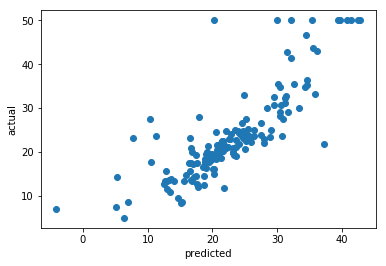

In [32]:
plt.scatter(predicted,labelsTest)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

## comparing results from sgd regressor and custom regressor

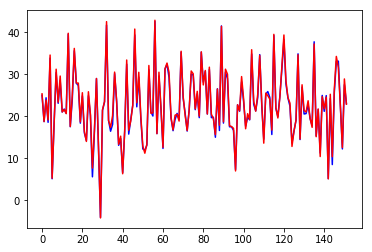

In [33]:
plt.plot(sgdPred,color="b")
plt.plot(np.array(predicted).reshape(152,1),color="r")

## comparing difference of  custom implementation and actual values

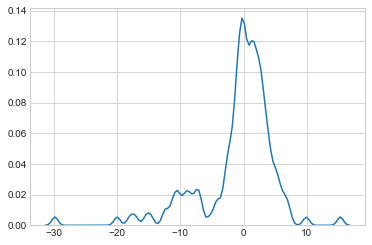

In [34]:
predicted=np.array(predicted).reshape(152)
deltaY=predicted-labelsTest
import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(deltaY, bw=0.5)
plt.show()

the mean value is almost 0 and there's little bit of variance.

## kde plot for actual values of dataset

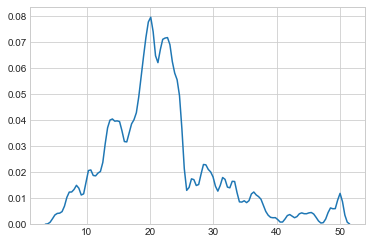

In [35]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(labelsTrain), bw=0.5)
plt.show()

## kde plot for predicted values of dataset

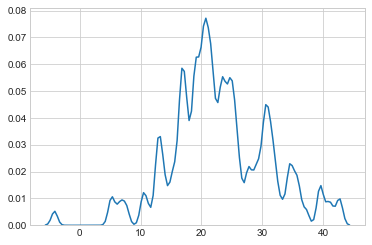

In [36]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(predicted), bw=0.5)
plt.show()

### Mean squared error for sklearn's implmentation

In [37]:
mean_squared_error(labelsTest,sgdPred)

37.02328322781862

### mean squared error for custom implementation

In [38]:
mean_squared_error(labelsTest,predicted)

34.92011227112719